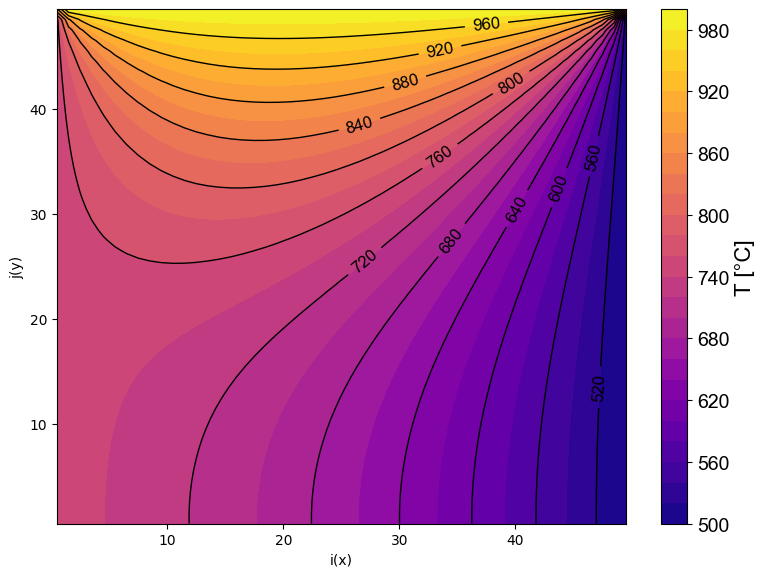

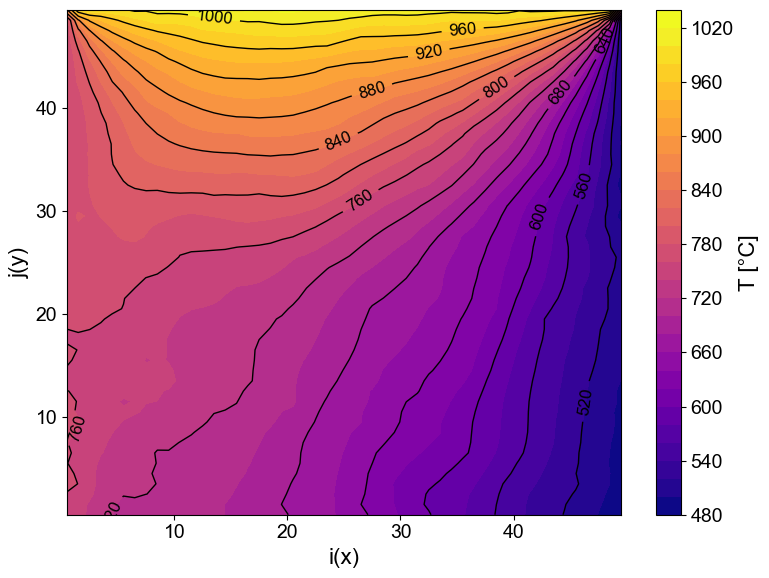

In [5]:
from pathlib import Path
import sys

BASE_DIR = Path().resolve()
sys.path.append(str(BASE_DIR.parent / 'scr'))

from solver_fd import temp_chapa_P, temp_chapa_P2, predecirTemperaturaChapa
from utils import graficarChapa

#   ........... VARIABLES X DE TESTEO ........................................

typ_cond_contorno = {'A':'flu','B':'temp','C':'temp','D':'temp'}

cond_contor = {'A':0,'B':500,'C':1000,'D':750}

k = 200 

hot_point = {'i': 0, 'j': 15, 'T': 750}

Nx = Ny =50
dx = dy = 0.05

#   ........... MODELO ENTRENADO ..............................................

folder_results = 'MLP_100000_test_run4'

#..............................................................................

T_true = temp_chapa_P(cond_contor, Nx, Ny, typ_cond_contorno, dx, dy, k, hot_point)

T_pred = predecirTemperaturaChapa(cond_contor, typ_cond_contorno, k, folder_results,hot_point, incluir_hot_point=True)

graficarChapa(T_true, 50, 50,titulo=None)
graficarChapa(T_pred, 50, 50,titulo=None)


Se muestra la muestra con índice: 8109

=== Condiciones de Contorno ===
+---------+---------------------+-----------+
| Borde   | Tipo de condición   |     Valor |
+=========+=====================+===========+
| A       | flu                 | -9084.43  |
+---------+---------------------+-----------+
| B       | flu                 | -7086.51  |
+---------+---------------------+-----------+
| C       | temp                |    11.066 |
+---------+---------------------+-----------+
| D       | temp                |   115.618 |
+---------+---------------------+-----------+

=== Punto Caliente ===
+-----+-----+---------+
|   i |   j |    Temp |
+=====+=====+=========+
|  19 |   3 | 729.702 |
+-----+-----+---------+

Material: Copper - Constantan (60% Cu, 40% Ni)

Comparación de distribuciones:
Diferencia máxima: 176.9083 °C
Diferencia media:  35.4933 °C
Desvío estándar:   22.1243 °C


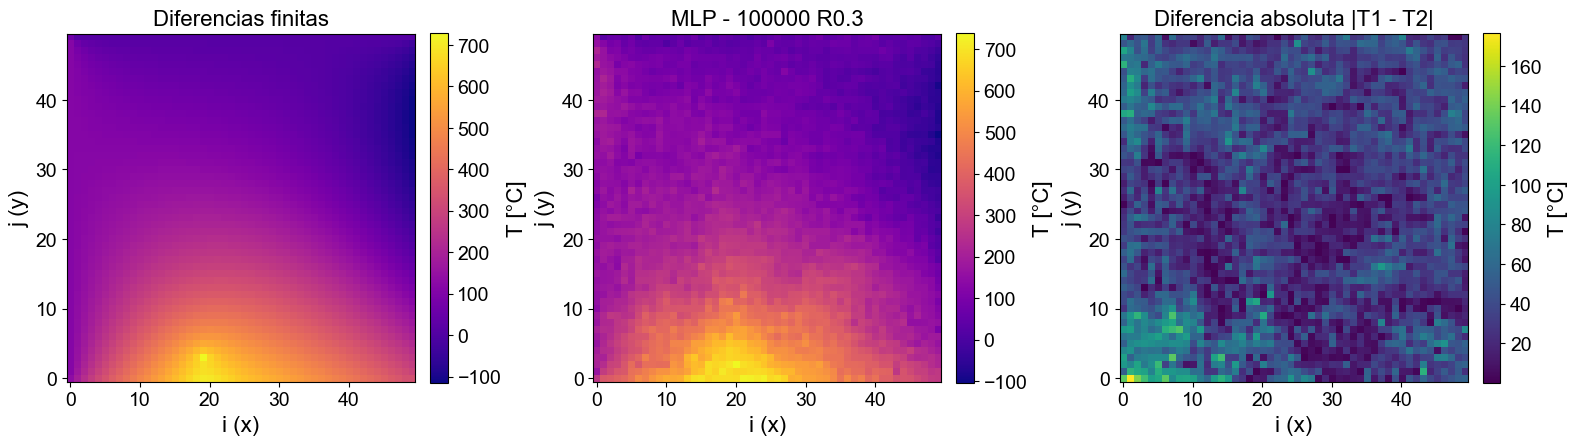


Comparación de distribuciones:
Diferencia máxima: 181.3523 °C
Diferencia media:  35.4523 °C
Desvío estándar:   23.5280 °C


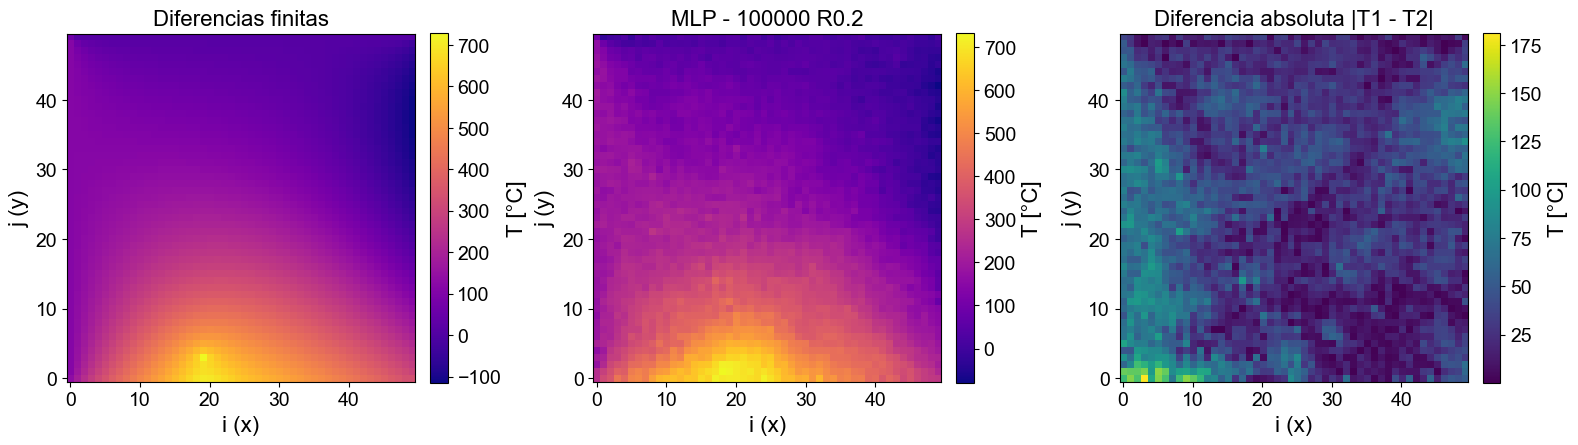


Comparación de distribuciones:
Diferencia máxima: 108.1525 °C
Diferencia media:  19.7489 °C
Desvío estándar:   14.8216 °C


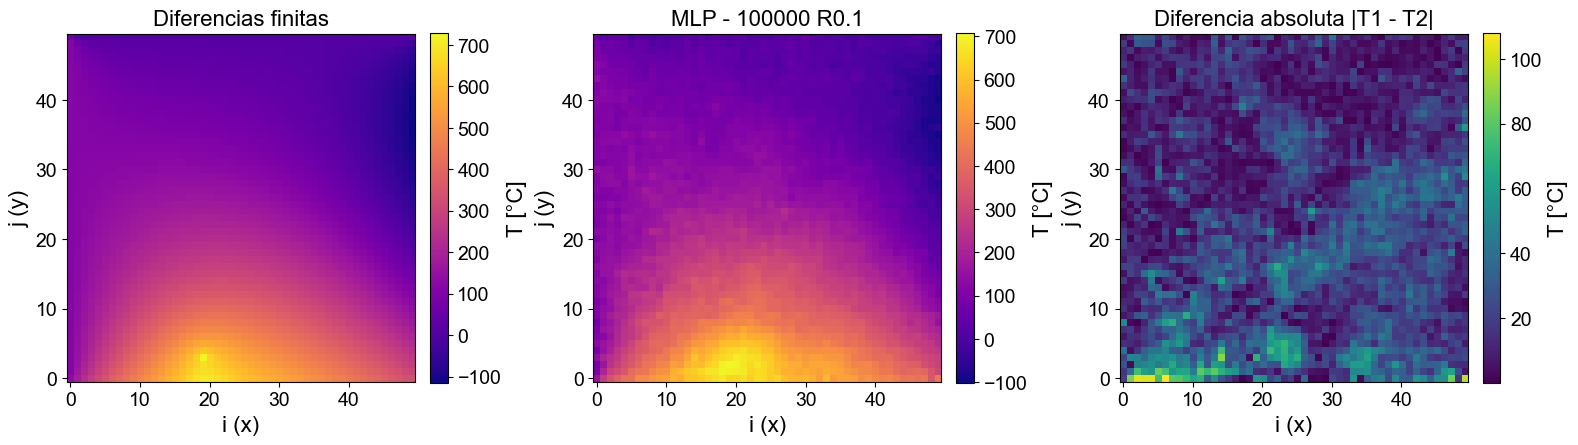


Comparación de distribuciones:
Diferencia máxima: 92.9037 °C
Diferencia media:  32.1470 °C
Desvío estándar:   12.0841 °C


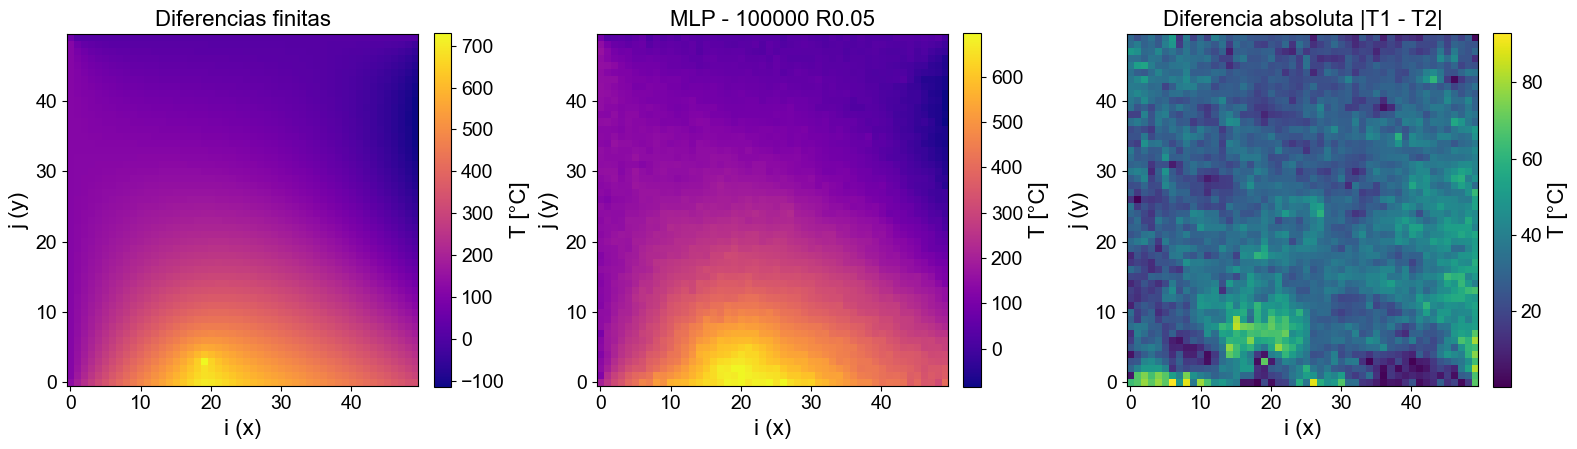


Comparación de distribuciones:
Diferencia máxima: 106.9984 °C
Diferencia media:  27.3684 °C
Desvío estándar:   12.7781 °C


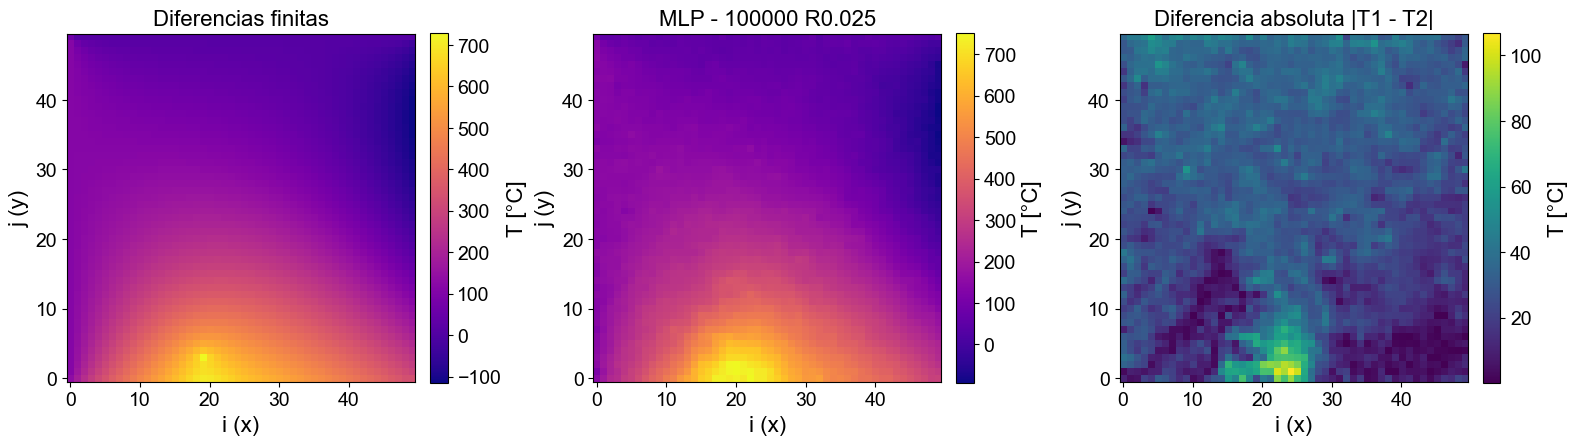


Comparación de distribuciones:
Diferencia máxima: 135.1112 °C
Diferencia media:  13.5255 °C
Desvío estándar:   10.2847 °C


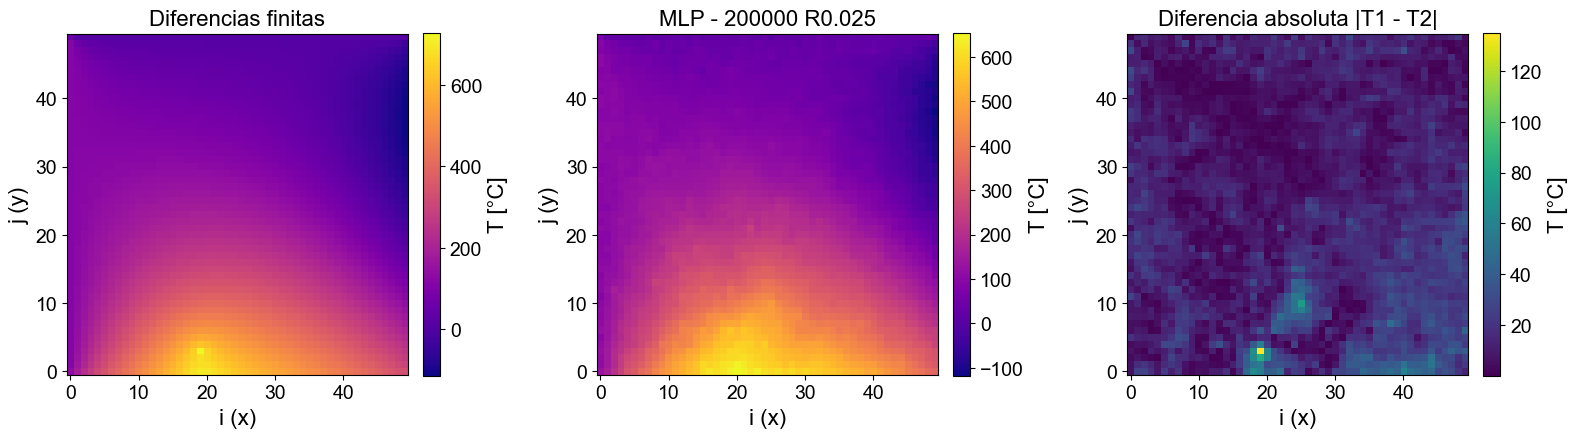

In [67]:
from pathlib import Path
import sys

BASE_DIR = Path().resolve()
sys.path.append(str(BASE_DIR.parent / 'scr'))

from utils import graficarChapa, comparar_T, compararModelos

# --- Datos y resultados ---
folder_data = 'dataset_200000_test'
# folder_resultsM = ['MLP_1000_test_run00011','MLP_5000_test_run00011','MLP_50000_test_run00011','MLP_100000_test_run00011','MLP_200000_test_run00011']
# folder_results = ['MLP - 1000','MLP - 5000','MLP - 50000','MLP - 100000','MLP - 200000']

folder_resultsM = ['MLP_100000_test_run00015','MLP_100000_test_run00016','MLP_100000_test_run00017','MLP_100000_test_run00018','MLP_100000_test_run00019','MLP_200000_test_run00019']
folder_results = ['MLP - 100000 R0.3','MLP - 100000 R0.2','MLP - 100000 R0.1','MLP - 100000 R0.05','MLP - 100000 R0.025','MLP - 200000 R0.025']


Y_true_img, y_results = compararModelos(folder_data, folder_resultsM, 'val', idx_muestra=None, mostrarTabla=True)


for i, prediccion in enumerate(y_results):
    nombre_modelo = folder_resultsM[i]
    comparar_T(
        Y_true_img,
        prediccion,
        50, 50,
        nombre_modelo,
        etiquetas=('Diferencias finitas', f'{folder_results[i]}'),
        escala=False,
        titulo=False
    )

# # graficarChapa(Y_true_img, 50, 50,None)
